#### Importing the packages

In [97]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [98]:
df=pd.read_csv('loan.csv')
pd.set_option('display.max_columns',None)

#### Data Undertanding & Cleaning

Here we understand the data & its significance and based on that we perfom cleaning as and when needed
##### Cleaning includes:
- Fixing rows & columns
- Fixing missing values
- Standardizing values
- Fixing invalid values
- Filtering Data


Viewing the first 5 samples from the data

In [99]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Checking the brief summary of the dataframe

In [100]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

Total number of rows & columns before any processsing

In [101]:
df.shape

(39717, 111)

Checking for duplicate rows if any throughout the dataframe. Oberved below that there is no duplicate row.

In [104]:
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


Getting brief statistical information of the data which helps to form an idea about the values like range(min & max),percentiles(25,50 & 75),standard deviation(std), etc

In [105]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Since we see there are numerous columns with null values throughout the sample, lets check if they are completely missing. If they are actually, then we need to drop them before anything as it will not convey any meaningful insight. We will begin with null value columns & checking the total percentage of null values in the whole dataset and then proceed to other segments

In [106]:
round((df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100,2)

51.34

We see more than 50% of the values are null, we need to figure out the columns if they are completely null

In [107]:
(df.isnull().sum()/df.shape[0]==1).sum()

54

We see 54 out of 111 columns contains complete null values, dropping these columns as it does not add any value in here

In [108]:
df=df[df.columns[(df.isnull().sum()/df.shape[0]!=1)]]

After removing those columns we will check the null value percentage in total dataset & number of columns remaining

In [109]:
round((df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100,2)

5.24

In [110]:
df.shape

(39717, 57)

We have reduced to only 5.24% now and 57 columns are present now. Next we need to figure out which parameters are still resulting to missing values and how we can handle those

In [111]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

The remaining features having more than 50% null values are removed.

In [112]:
df=df[df.columns[(df.isnull().sum()/df.shape[0]<0.50)]]

Checking contents of each elements & deciding how to proceed

In [118]:

for i in df.columns:
    print("Value counts for column "+i)
    print(df[i].value_counts())
    print("_______________________________________________________________________________")

Value counts for column id
1052670    1
685540     1
253425     1
730606     1
867821     1
          ..
807743     1
1006398    1
1000253    1
871228     1
380631     1
Name: id, Length: 39717, dtype: int64
_______________________________________________________________________________
Value counts for column member_id
745584     1
900541     1
634745     1
943558     1
896958     1
          ..
875198     1
803517     1
1264316    1
942777     1
1251331    1
Name: member_id, Length: 39717, dtype: int64
_______________________________________________________________________________
Value counts for column loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
12525       1
16675       1
6175        1
22300       1
28750       1
Name: loan_amnt, Length: 885, dtype: int64
_______________________________________________________________________________
Value counts for column funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000  

0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
44.840000        1
16.010000        1
29.914662        1
23.820000        1
47.307614        1
Name: total_rec_late_fee, Length: 1356, dtype: int64
_______________________________________________________________________________
Value counts for column recoveries
0.00      35499
10.40         4
11.29         4
19.20         3
13.59         3
          ...  
240.15        1
385.70        1
995.74        1
176.49        1
269.31        1
Name: recoveries, Length: 4040, dtype: int64
_______________________________________________________________________________
Value counts for column collection_recovery_fee
0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
340.0000        1
6.9239          1
33.2896         1
9.6738          1
20.6521         1
Name: collection_recovery_fee, Length: 2616, dtype: int64
__________________

- Dropping 'id','member_id' & 'url' since it cannot be among driver variable due to their uniqueness
- 'emp_title' since it is not signifying the type of job mainly the job security of the person.
- The 'desc' and 'title' are conveying same meaning as purpose while later being more compact. 
- 'pymnt_plan', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'initial_list_status' & 'tax_liens' has all same values throughout which has no new significance
- earliest_cr_line since considering the first time loan is not holding any value here

In [126]:
df=df.drop(columns=['id','member_id','emp_title','initial_list_status','earliest_cr_line','desc','title','pymnt_plan','url','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

In [127]:
df.shape

(39717, 38)

Removing less significant columns, now there are 38 columns to be analysed.

Checking the values in each column with Dtype object because they have high chance of having distorted value than their original form

In [130]:
for i in df.columns[df.dtypes =='object']:
    print("Distinct value counts for column "+i)
    print(df[i].value_counts())
    print("__________________________________________")

Distinct value counts for column term
 36 months    29096
 60 months    10621
Name: term, dtype: int64
__________________________________________
Distinct value counts for column int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.72%      1
24.59%      1
16.01%      1
16.15%      1
21.48%      1
Name: int_rate, Length: 371, dtype: int64
__________________________________________
Distinct value counts for column grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64
__________________________________________
Distinct value counts for column sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2  

In [131]:
#fixing term column
df.term=df.term.apply(lambda x: int(x.split()[0]))

In [132]:
#fixing int_rate column
df.int_rate=df.int_rate.apply(lambda x: float(x[:-1]))

Let's check the min & max value for int_rate and group it into 3 categories High, Medium & Low

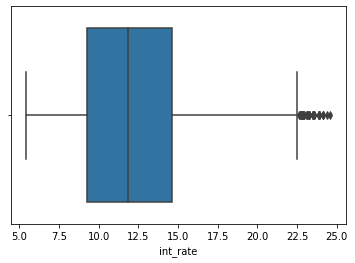

In [140]:
sns.boxplot(df.int_rate)

In [141]:
#Classifying interest rate as per current market standards
def categorize_rate(a):
    if a>0.0 and a<=8.0:
        return "Low(0-8)"
    elif a>8.0 and a<=12.0:
        return "Medium(8-12)"
    else:
        return "High(12+)"
    

In [142]:
#derived metrics
df['int_rate_scale']=df.int_rate.apply(lambda x:categorize_rate(x))

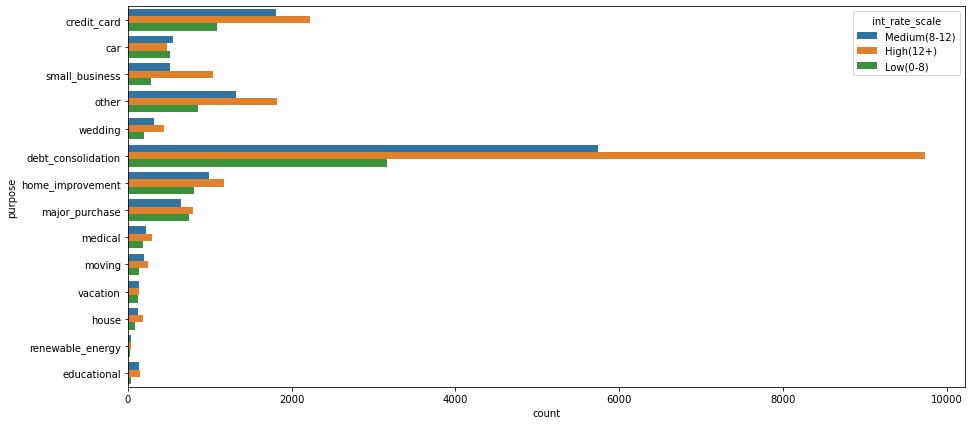

In [143]:
#univariate_segmented 1
plt.figure(figsize=(15,7))
sns.countplot(y=df.purpose,data=df,hue=df.int_rate_scale)

Here we observed that most of the people have taken loan for debt consolidation with high interest rate.

In [144]:
#fixing emp_length column 
df.emp_length=df.emp_length.apply(lambda x: str(x).split()[0])
df.emp_length=df.emp_length.replace('10+','10')
df.emp_length=df.emp_length.replace('<','0')

In [145]:
df=df[df.emp_length!= 'nan']

We can create a derived column like 'dti' naming 'lti' i.e. loan_to_income ratio using loan_amt & annual_inc,thus combining both to 1. We are not considering funded amount here because while applying for loan we are not sure of how much amount gets funded

In [146]:
#data driven derived metrics from loan_amnt & annual_inc
df['Lti']=round(df.loan_amnt/df.annual_inc,2)

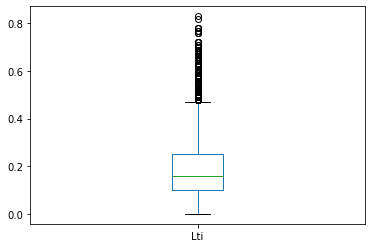

In [147]:
#we see a lot of outliers are present above 50%
df.Lti.plot.box()

Removing 'Current' loans from loan_status since it is still in progress we cannot draw promising inference from it

In [148]:
df=df[df.loan_status!='Current']

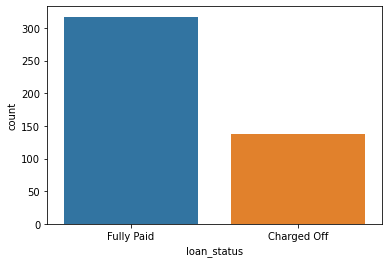

In [149]:
sns.countplot(x=df[df.Lti>0.5]['loan_status'],data=df)


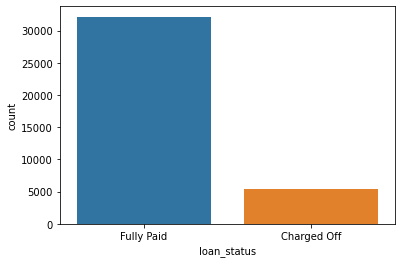

In [150]:
sns.countplot(x=df.loan_status,data=df)

Since there are outliers above 50% we will check their loan_status

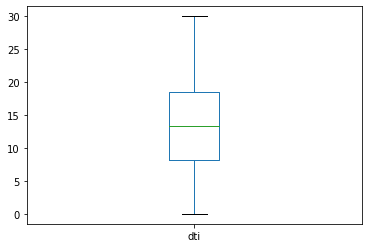

In [151]:
df.dti.plot.box()

There are no outliers present for dti we will group this data too into high,medium & low

As per the reports lower the dti higher the chances of getting accepted.Lenders expect the dti should be atleast less than 35% which is true for all conditions here


In [152]:
#categorizing dti 
def categorize_dti(a):
    if a>0.0 and a<=10.0:
        return "Low(0-10)"
    elif a>10.0 and a<=20.0:
        return "Medium(10-20)"
    else:
        return "High(20+)"
    

In [153]:
df['dti_scale']=df.dti.apply(lambda x: categorize_dti(x))

In [154]:
# merging 'Source Verified' & 'Verified' as since either way it is verified
df.verification_status=df.verification_status.apply(lambda x: "Verified" if x=="Source Verified" else x)

Extracting month & year from issue date column

In [155]:
df['issue_month'] = df['issue_d'].apply(lambda x: x.split("-")[0]).astype('str')
df['issue_year'] = df['issue_d'].apply(lambda x: str(20)+x.split("-")[1]).astype('int')

In [157]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_scale,Lti,dti_scale,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Medium(8-12),0.21,High(20+),Dec,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,High(12+),0.08,Low(0-10),Dec,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,2,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,High(12+),0.20,Low(0-10),Dec,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,1,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,High(12+),0.20,Medium(10-20),Dec,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,3,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,Low(0-8),0.14,Medium(10-20),Dec,2011


In [158]:
#fixing revol_util column
df['revol_util']=df[~df['revol_util'].isna()]['revol_util'].apply(lambda x: x[:-1])

In [164]:
print("Median: ", df.revol_util.astype('float').median())
print("Mean: ", df.revol_util.astype('float').mean())

Median:  49.3
Mean:  48.862290645642496


Mean & median is nearly equal so we can infer there is no outliers for this column. Thus, filling missing values in with median

In [166]:
df.revol_util.fillna(df.revol_util.astype('float').median(), inplace=True)
df.revol_util=df.revol_util.astype('float')

- Any Lending company checks for utilization percentage so dropping revol_bal
- issue_d is derived to new columns so dropping it
- loan_amnt & annual_inc since we will use lti
- dropping out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,ttotal_rec_late_fee,recoveries,collection_recovery_fee,
last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,total_acc since these are not available during application


In [167]:
df=df.drop(columns=['revol_bal','issue_d','loan_amnt','annual_inc','out_prncp','out_prncp_inv','total_rec_prncp'
                    ,'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                    'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','total_acc'],axis=1)

## Business Understanding
#### Three main categories of columns
- Customer Behaviour
- Loan Related Details
- Customer Demography

Below we have segmented features based on it

In [168]:
df_bhvr=['delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_util','pub_rec','pub_rec_bankruptcies']
df_loan=['funded_amnt','funded_amnt_inv','term','installment','grade','sub_grade',
'loan_status','total_pymnt','total_pymnt_inv','dti_scale','lti','issue_month','issue_year']
df_demography=['emp_length','home_ownership','verification_status','purpose','zip_code','addr_state']


In [171]:
#checking for remaining null valuesplt.subplot(4,4)for i in df_bhvr:
print(i)
df.isnull().sum()

last_credit_pull_d


funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
verification_status       0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util                0
total_pymnt               0
total_pymnt_inv           0
pub_rec_bankruptcies    697
int_rate_scale            0
Lti                       0
dti_scale                 0
issue_month               0
issue_year                0
dtype: int64

In [172]:
df.pub_rec_bankruptcies.value_counts()

0.0    35312
1.0     1530
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [173]:
#we will fill the values with 0.0 for null values
df.pub_rec_bankruptcies.fillna(value=0.0,inplace=True)

Dataset after processing missing values & applying business understanding

In [174]:
df.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,int_rate_scale,Lti,dti_scale,issue_month,issue_year
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0,1,3,0,83.7,5863.155187,5833.84,0.0,Medium(8-12),0.21,High(20+),Dec,2011
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,Verified,Charged Off,car,309xx,GA,1.00,0,5,3,0,9.4,1008.710000,1008.71,0.0,High(12+),0.08,Low(0-10),Dec,2011
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0,2,2,0,98.5,3005.666844,3005.67,0.0,High(12+),0.20,Low(0-10),Dec,2011
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,Verified,Fully Paid,other,917xx,CA,20.00,0,1,10,0,21.0,12231.890000,12231.89,0.0,High(12+),0.20,Medium(10-20),Dec,2011
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,Verified,Fully Paid,wedding,852xx,AZ,11.20,0,3,9,0,28.3,5632.210000,5632.21,0.0,Low(0-8),0.14,Medium(10-20),Dec,2011


In [175]:
df.shape

(37544, 28)

### Univariate Analysis

- Box plots
- Countplots

In [176]:
#function for box plots in unvariate 
def univ_box(a,name):
    sns.boxplot(y=a,data=df)
    plt.savefig(name+".png")
    plt.title(name)
    plt.plot()

In [177]:
#function for countplot 
def countplot(a,title,hue,order,df):
    plt.figure(figsize=(15,7))
    p1=sns.countplot(x=a,hue=hue,order=order,data=df)
    for p in p1.patches:
        y=p.get_bbox().get_points()[1,1]
        p1.annotate('{:.1f}%'.format(y*100/df.shape[0]), (p.get_x()+0.1, p.get_height()+50))
    plt.savefig(title+".png")
    plt.title(title)
    plt.plot()
        

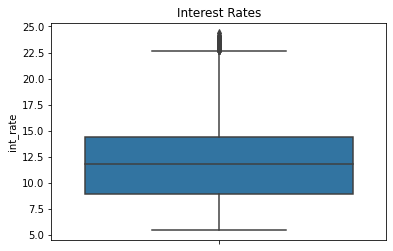

In [178]:

univ_box(df.int_rate,"Interest Rates")

In [179]:
df.int_rate.describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

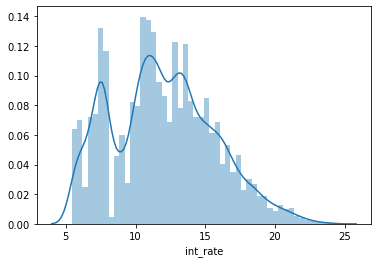

In [180]:
sns.distplot(df.int_rate)

# Inference
# There are outliers above upper hinge
# the median & mean is nearly equal so it does not impact much
# the data is left skewed

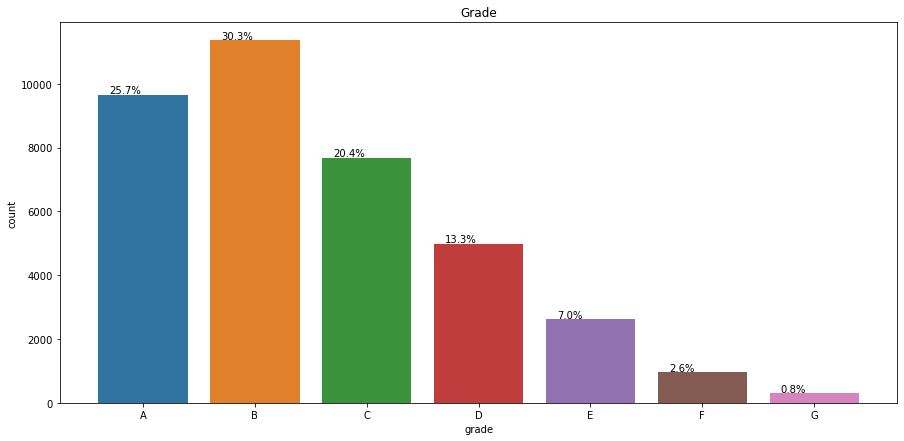

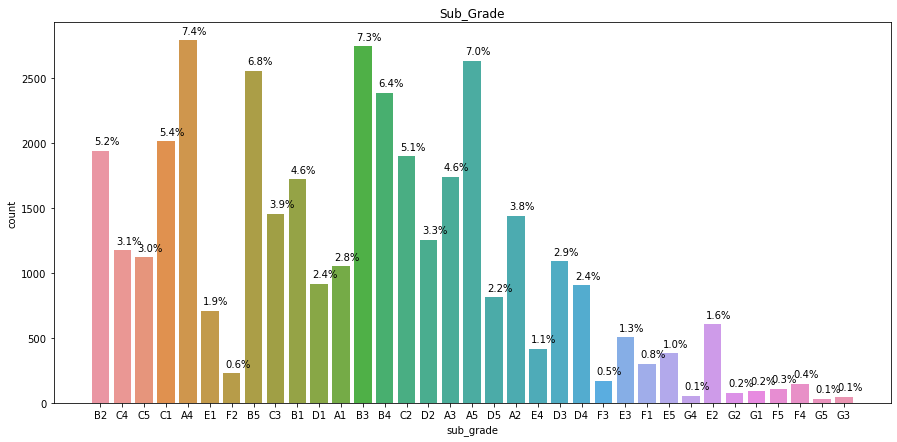

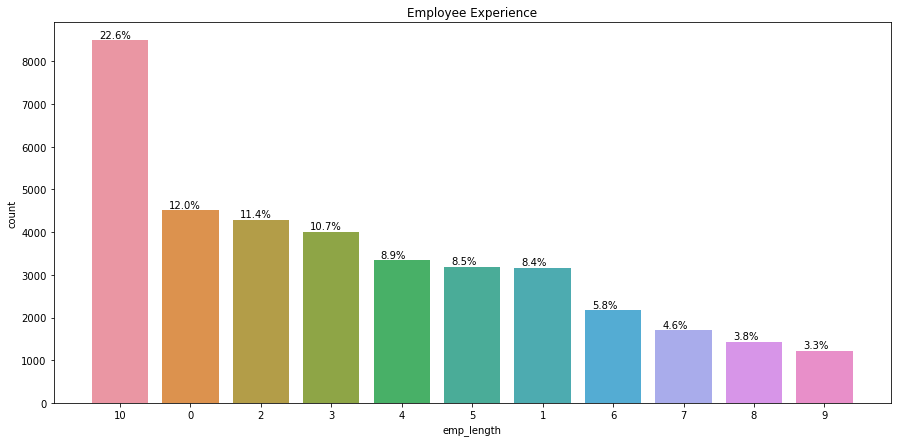

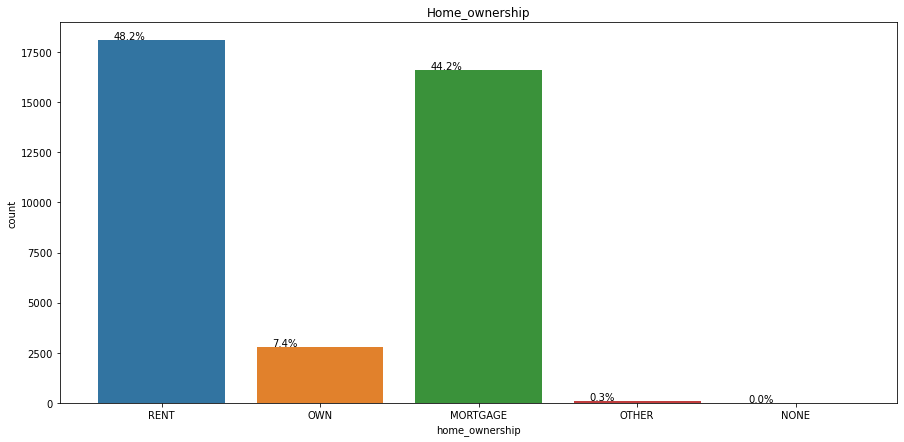

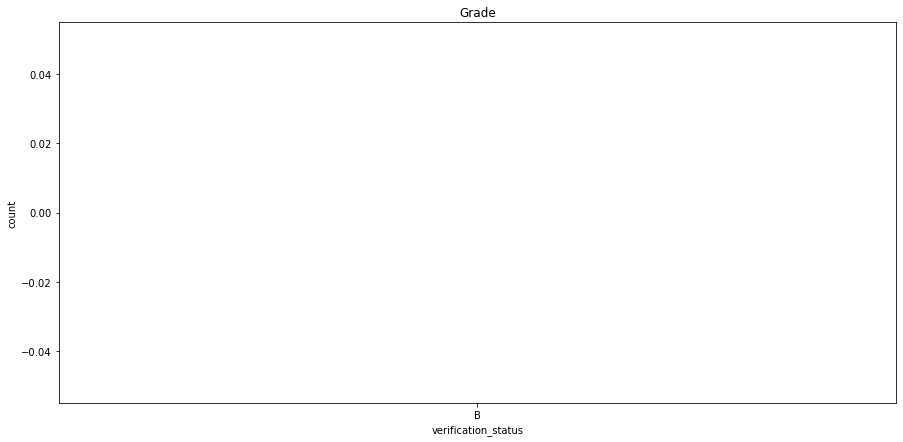

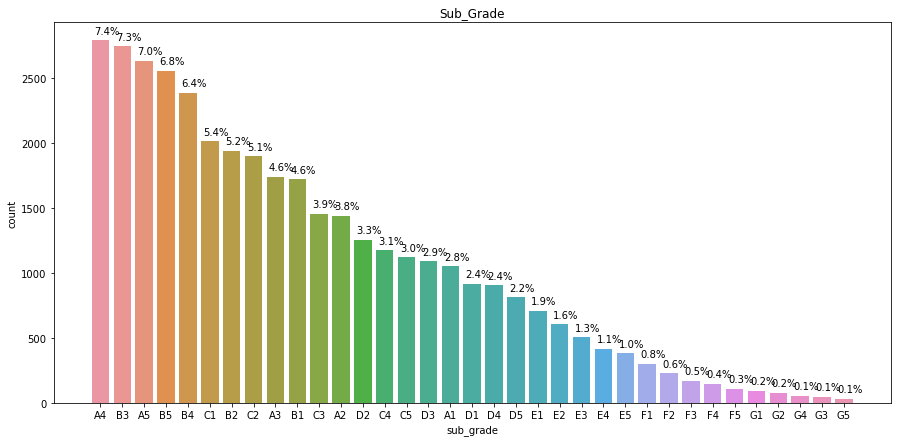

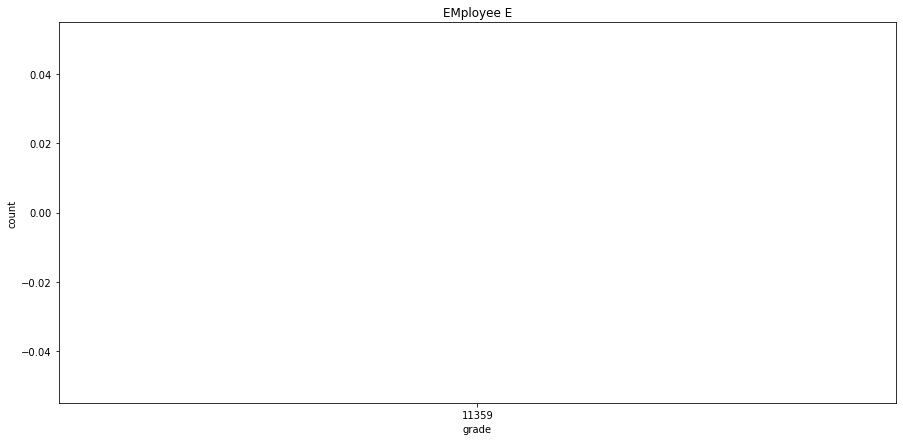

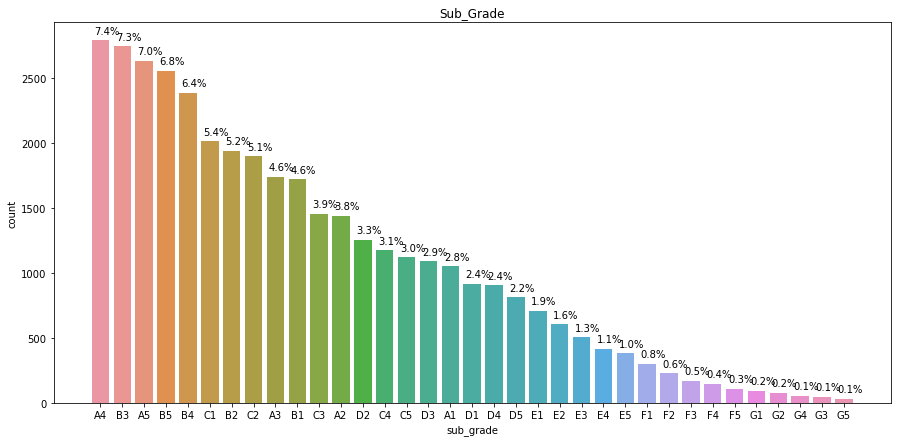

In [200]:
countplot(df.grade,"Grade",None,["A","B","C","D","E","F","G"],df)
countplot(df.sub_grade,"Sub_Grade",None,None,df)
countplot(df.emp_length,"Employee Experience",None,df.emp_length.value_counts().index,df)
countplot(df.home_ownership,"Home_ownership",None,None,df)
countplot(df.verification_status,"Grade",None,df.grade.value_counts().index,df)
countplot(df.sub_grade,"Sub_Grade",None,df.sub_grade.value_counts().index,df)
countplot(df.grade,"EMployee E",None,df.grade.value_counts(),df)
countplot(df.sub_grade,"Sub_Grade",None,df.sub_grade.value_counts().index,df)

### Inference
Grade A & B loans are mostly chosen

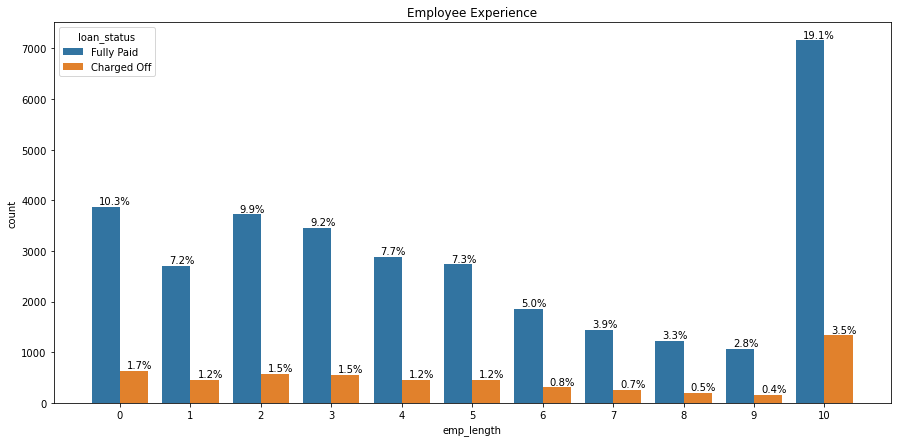

In [202]:
countplot(df.emp_length,"Employee Experience","loan_status",["0","1","2","3","4","5","6","7","8","9","10"],df)

Here we can observe that employee experience have inverse effect on loan status. The less years of experience is causing more number of loans. So emp_length is one of the driving factor for loan status

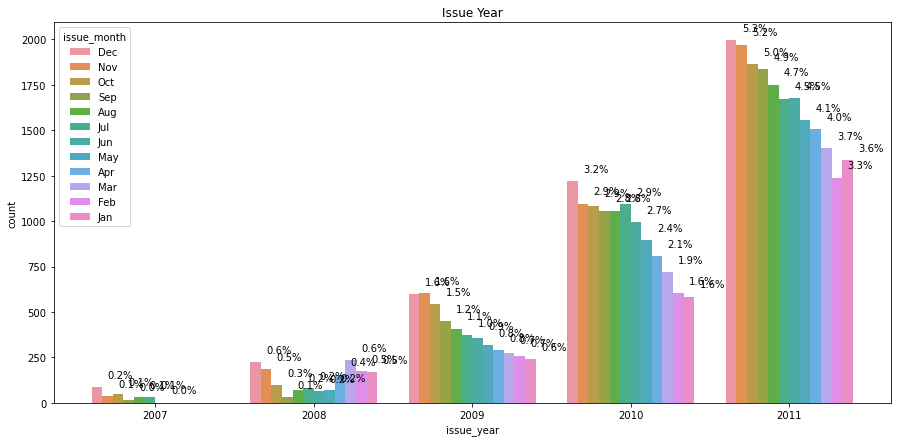

In [205]:
countplot(df.issue_year,"Issue Year","issue_month",None,df)

Here is can be observed that with every year number of loans are increasing and each year on the month of december the requirement of loan is the most.

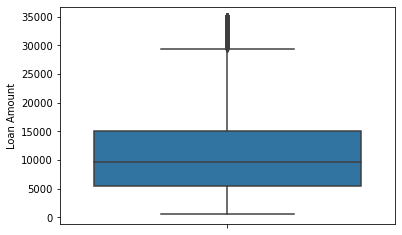

In [210]:
sns.boxplot( y=df["funded_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [214]:
df[df['funded_amnt']>3000]['loan_status'].value_counts()

Fully Paid     29000
Charged Off     4898
Name: loan_status, dtype: int64

In [185]:
combine--pub_rec_backruptcies, pub_rec, delinq_2yrs ////domain knowledge--customer demography loan

SyntaxError: invalid syntax (<ipython-input-185-987f5bacf8f5>, line 1)

In [ ]:
online loan marketplace--digital lending

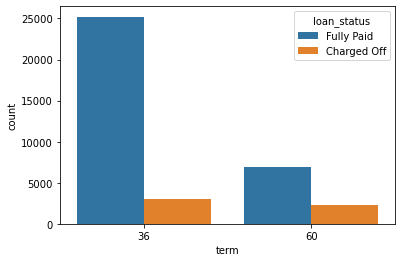

In [186]:
sns.countplot(x=df.term,data=df,hue=df.loan_status)

In [187]:
df.annual_inc.plot.box()

AttributeError: 'DataFrame' object has no attribute 'annual_inc'

In [188]:
df.term.value_counts()

36    28287
60     9257
Name: term, dtype: int64

In [ ]:
df.verification_status.value_counts() #not related to loan status

In [ ]:
df[['loan_amnt','funded_amnt','funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','delinq_2yrs','loan_status', 'verification_status']]

In [ ]:
df.funded_amnt_inv

In [ ]:
include duplicate check to if same person has taken >1 loans

In [ ]:
df[df.funded_amnt==df.total_pymnt].count()#funded amnt is important for lender that loan_amnt

In [ ]:
df[df.loan_amnt==df.funded_amnt].count()#funded amnt is important for lender that loan_amnt

In [ ]:
df[df.funded_amnt>df.funded_amnt_inv].count()# sanctioned amount not completely invested

Next we look for the columns which still has missing values and also simultaneously checking the significance of those columns whether to drop it or impute values 

In [ ]:
df_missing_val=np.append(df_missing_val,'loan_status')

In [ ]:
df.mths_since_last_record.isnull().sum()/df.shape[0]

In [ ]:
df.head(20)

In [ ]:
df.columns

In [ ]:
cols to keep---- loan_amnt, funded amnt, funded amnt inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,open_acc,out_prcp,total_acc,delinq_amnt,pun_rec_bankruptcies,tax_lienss

In [ ]:
#plt.figure(figsize=(10,7))
#sns.countplot(x=df.emp_title,data=df)
#plt.plot()
df.emp_title.unique()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
dti & home |LS
annual inc & verification|LS
funded amt/annual inc|LS
issue_d against loan_status|LS